# The superCDMS Germanium Detector

In this notebook we will explore a new dataset associated with a specific particle physics detector prototype. The **Super Cryogenic Dark Matter Search (SuperCDMS)** is an expleriment designed to detect weak force mediated interactions between dark matter candidate particles and the nuclei within the detector. 

The dataset we are going to explore was obtained by performing experiments on a prototype detector. The detector, dataset, and a number of models are available in [this github repository](https://github.com/FAIR-UMN/FAIR-UMN-CDMS). As a very quick summary, the detector prototype has a cylindrical shape with top and bottom circular surfaces padded with small semiconductor sensors to detect phonons. These sensors are grouped to form six channels that are identified with the letters **A** to **F**. To obtain the data for these experiments, a radioactive source was placed on thirteen different locations along a radial line. When neuclear interactions take place, phonon vibrations are recorded by the sensors and obtained as a rising-then-falling waveshape. This dataset records 19 measurements associated with each interaction.

- **Start time:** The time it takes the pulse to reach 20% height for channels B,C,D, and F with respect to channel A
- **Rise time:** The time it takes the pulse reach 50% height from 20% for channels A,B,C,D, and F
- **Pulse width:** The width in time for the pulse at 80% height for channels A,B,C,D, and F
- **Fall time:** The time it takes the pulse reach 20% height from 40% for channels A,B,C,D, and F

The interaction location is measured with respect to the center of the detector with the center identified with coordinate 0 and the furthest interaction point at -41.9 mm.

# Exploring the superCDMS dataset

In this section, we want to take a quick look at the different aspects of the dataset. This is a relatively small dataset, so it should be easily possible to download the dataset and perform these exercises using a not-so-fancy computer. First, let's download the data using the `wget` command.

In [1]:
!mkdir -p data
!wget  -O data/CDMS_Dataset.csv https://github.com/FAIR-UMN/FAIR-UMN-CDMS/blob/main/data/processed_csv/processed_combined.csv?raw=true

--2022-06-29 11:22:08--  https://github.com/FAIR-UMN/FAIR-UMN-CDMS/blob/main/data/processed_csv/processed_combined.csv?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/FAIR-UMN/FAIR-UMN-CDMS/raw/main/data/processed_csv/processed_combined.csv [following]
--2022-06-29 11:22:09--  https://github.com/FAIR-UMN/FAIR-UMN-CDMS/raw/main/data/processed_csv/processed_combined.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FAIR-UMN/FAIR-UMN-CDMS/main/data/processed_csv/processed_combined.csv [following]
--2022-06-29 11:22:09--  https://raw.githubusercontent.com/FAIR-UMN/FAIR-UMN-CDMS/main/data/processed_csv/processed_combined.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133,

Now we will import a number of libraries to facilitate data visualization. We want to explore the organization of the dataset, pairwise joint distribution for a number of features, and the individual dependencies of the impact location *y* with some of the features. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# from sklearn.model_selection import *
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression
# from sklearn.gaussian_process import GaussianProcessRegressor as GPR
# from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import pandas as pd
import seaborn as sns

In [3]:
## Get the dataset as a panda dataframe and inspect a few entries

data = pd.read_csv('data/CDMS_Dataset.csv', sep=',')
print("Shape of the dataset = ", data.shape)
data

Shape of the dataset =  (7151, 21)


,Row,PBstart,PCstart,PDstart,PFstart,PArise,PBrise,PCrise,PDrise,PFrise,...,PBfall,PCfall,PDfall,PFfall,PAwidth,PBwidth,PCwidth,PDwidth,PFwidth,y
0,1735,-0.000007,-0.000017,-1.200000e-05,-0.000031,0.000023,0.000023,0.000016,0.000013,0.000009,...,0.000221,0.000211,0.000189,0.000154,0.000200,0.000206,0.000198,0.000056,0.000039,0.0
1,2020,-0.000005,-0.000016,-1.060000e-05,-0.000030,0.000024,0.000023,0.000016,0.000013,0.000010,...,0.000227,0.000172,0.000201,0.000142,0.000190,0.000197,0.000204,0.000150,0.000036,0.0
2,2104,-0.000004,-0.000014,-1.230000e-05,-0.000030,0.000023,0.000020,0.000016,0.000013,0.000010,...,0.000204,0.000221,0.000200,0.000130,0.000202,0.000205,0.000202,0.000152,0.000034,0.0
3,2373,-0.000004,-0.000015,-9.970000e-06,-0.000029,0.000026,0.000022,0.000015,0.000013,0.000009,...,0.000205,0.000211,0.000216,0.000144,0.000194,0.000196,0.000212,0.000050,0.000038,0.0
4,2933,-0.000005,-0.000015,-1.110000e-05,-0.000030,0.000025,0.000023,0.000016,0.000013,0.000009,...,0.000196,0.000227,0.000227,0.000147,0.000198,0.000198,0.000219,0.000128,0.000038,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,116253,-0.000002,0.000056,6.776000e-06,0.000036,0.000011,0.000015,0.000031,0.000013,0.000025,...,0.000244,0.000291,0.000253,0.000292,0.000113,0.000167,0.000255,0.000146,0.000225,-41.9
7147,116387,-0.000005,0.000057,3.448000e-06,0.000036,0.000010,0.000015,0.000028,0.000013,0.000026,...,0.000230,0.000267,0.000234,0.000233,0.000106,0.000168,0.000240,0.000145,0.000224,-41.9
7148,116633,-0.000007,0.000054,-5.080000e-07,0.000035,0.000011,0.000017,0.000034,0.000014,0.000027,...,0.000266,0.000272,0.000276,0.000272,0.000116,0.000177,0.000247,0.000165,0.000233,-41.9
7149,116941,-0.000002,0.000058,7.625000e-06,0.000039,0.000012,0.000016,0.000030,0.000015,0.000027,...,0.000235,0.000254,0.000267,0.000263,0.000124,0.000160,0.000258,0.000169,0.000225,-41.9


As the shape of the dataset reveals, there are a total of 7151 entries with 21 columns in the dataset. 19 of these columns represent the 19 features described earlier and the entry with label *y* is the physical impact location. Since the data values for the features are quite small in the given units (seconds), let's multiply them by a factor of $10^6$ to convert the unit in microseconds ($\mu$s).

After that, let's explore the distributions for a few variables.

In [4]:
features = list(data.columns)[1:]
data[features[:-1]] = data[features[:-1]]*1e6
x_data = data.values[:,1:-1]
y_data = data.values[:, -1]
n_features = len(features)

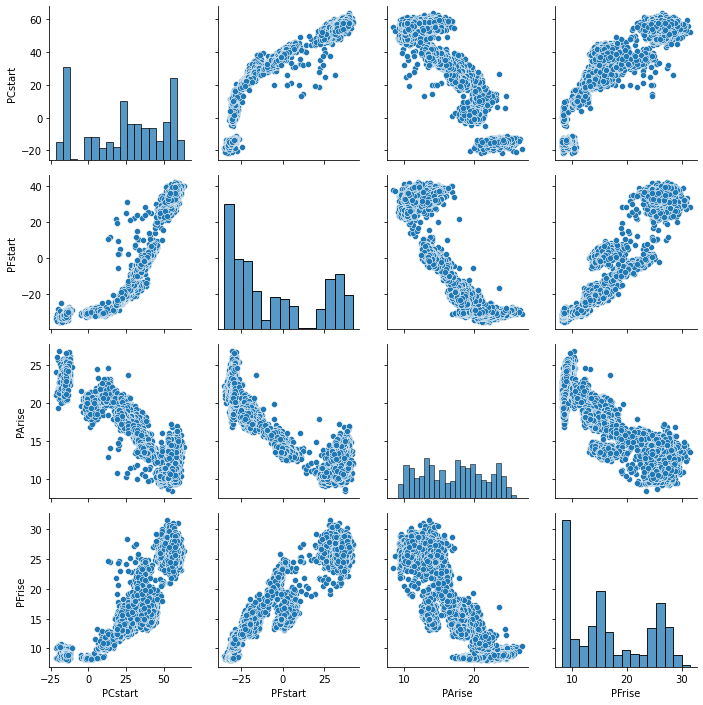

In [5]:
cols_to_choose = ['PCstart', 'PFstart', 'PArise', 'PFrise']
x_subset = data[cols_to_choose]
g = sns.PairGrid(x_subset)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

These plots above show the pairwise distribution for four of the 19 features in this dataset. The diagonal entries show the distribution of the feature and the off-diagonal entries show pairwise distribution for the features. Visual inspection suggests there are some correlations among these variables, which is probably expected given the nature of these features. For instance, it is naively expected to have a larger pulse width (*PCwidth*) if the pulse takes longer to rise (*PCrise*). 

Now let's see how the target variable *y* depends on these features.

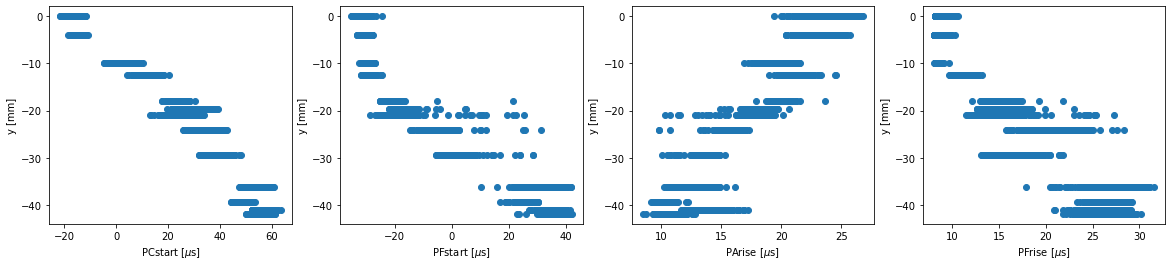

In [6]:
fig, axes = plt.subplots(1,len(cols_to_choose), figsize=(20,4))
for ii, col in enumerate(cols_to_choose):
    x = x_subset[col]
    y = y_data
    axes[ii].scatter(x,y)
    axes[ii].set_xlabel(col + ' [$\mu$s]')
    axes[ii].set_ylabel('y [mm]')

Text(0, 0.5, 'Time measurements [$\\mu$s]')

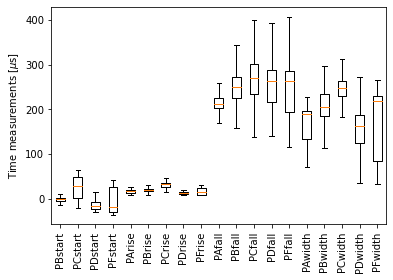

In [7]:
bp = plt.boxplot(x_data, showfliers=False)
xticks = plt.xticks(range(1,20),features[:-1],rotation=90)
plt.ylabel("Time measurements [$\mu$s]")

# FAIRness Evaluation of superCDMS dataset

Now, we will repeat the same exercise that we followed for the MNIST dataset in the previous notebook. Let's explore how this dataset fairs against the FAIR metrics introduced earlier.

## Findability

_F1. (Meta)data are assigned a globally unique and persistent identifier_

The identifier associated with the CDMS dataset is the DOI `10.34740/kaggle/dsv/2660709`. This is both unique and persistent. However, some of the metadata is only found in the metadata associated with the `kaggle` entry and some details are found in the associated [github repository](https://github.com/FAIR-UMN/FAIR-UMN-CDMS). Neither content has been associated with a DOI or some other persistent identifier. This fails the check for uniqueness and persistence of identifiers for metadata accessible since (1) content of git repositories can be changed as the user keeps modifying it, (2) github repos are not permanent URIs, and (3) the metadata associated with the DOI entry is not an independent digital entity.

**Assessment of uniqueness: Partially Pass (Pass for data but Fail for metadata) <br/>
Assessment of persistence: Partially Pass (Pass for data but Fail for metadata)**


### guideline for FAIR4HEP project: 
obtain a permanent URI for the metadata by registering it with w3id or DOI

_F2. Data are described with rich metadata_

The metadata of this dataset is described in the [associated documentation](https://github.com/FAIR-UMN/FAIR-UMN-CDMS/blob/main/doc/FAIR%20Document%20-%20Identifying%20Interaction%20Location%20in%20SuperCDMS%20Detectors.pdf). This metadata is not necessarily machine-readable. However, since the dataset is provided as a `csv` with column names, some degree of description can be retrieved from the dataset alone. No persistent identifier for metadata is provided. The textual description provides enough details of how the dataset was constructed and the content and format of these datasets.

**Assessment of machine readability of metadata: Partially Pass <br/>**
**Assessment of richness of metadat: Pass**

### guideline for FAIR4HEP project: 
create a machine-readable metadata (json, xml etc.) and include a unique identifier for the metadata.


_F3. Metadata clearly and explicitly include the identifier of the data they describe_

The textual description does not include the dataset identifier, the URL used to access this dataset. However, the DOI for the dataset is mentioned in the metadata associated with the `kaggle` entry.

**Assessment: Partially Pass**

### guideline for FAIR4HEP project: 
include the permanent URIs for data and metadata in the machine-readable as well as human-readable metadata. 


_F4. (Meta)data are registered or indexed in a searchable resource_

This dataset is made available in a widely used database repository [Kaggle](https://www.kaggle.com/fairumn/cdms-dataset)
**Assessment: Pass**

## Accessibility

_A1. (Meta)data are retrievable by their identifier using a standardised communications protocol_

The superCDMS dataset is an open dataset, and can be accessed via standard HTTP protocol as demonstrated before.

**Assessment: Pass**

_A2. Metadata are accessible, even when the data are no longer available_

The metadata is hosted as a separate documentation in the git repository, hosted independently of the dataset. 

**Assessment: Pass**

### guideline for FAIR4HEP project: 
We still need to make this metadata machine readable, include DOI and get a permanent DOI for it

## Interoperability

_I1. (Meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation_

The metadata comes with elaborate explanation of the format. The files are essentially in `csv` format with certain information about its organization explained in the metadata.

**Assessment: Pass**

_I2. (Meta)data use vocabularies that follow FAIR principles_

The metadata is descriptive and the vocabulary used to describe the dataset, its feature and formats are well understood and accepted within the particle physics community. All software dependencies are cited and documented with clear instructions on how to install them. Additionally, package dependencies to be used by cpu and gpu systems using `AnaConda` or `MiniConda` package management systems for accessing the dataset and running the code are also given.

**Assessment: Pass**

_I3. (Meta)data include qualified references to other (meta)data_

The git repository includes the raw dataset and guided notebooks on how to prepare the target dataset from the raw dataset. The raw dataset, as explained in the documentation, has been obtained from an experimental setup using a superCDMS prototype detector.

**Assessment: Pass**

## Reusability

_R1.1. (Meta)data are released with a clear and accessible data usage license_

The repository clearly specifies the license field.

**Assessment: Pass**

_R1.2. (Meta)data are associated with detailed provenance_

Metadata explains how the measurements for this dataset were obtained by comparing the observed physical waveforms from the six channels of the detector.

**Assessment: Pass**

_R1.3. (Meta)data meet domain-relevant community standards_

The details associated with the metadata are well accepted within the community. The nature of the dataset and the problems associated witht them are well explained with a number of Deep NN based models trained and validated in that context.

**Assessment: Pass**